In [291]:
import csv
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import statistics
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
# from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [292]:
df = pd.read_csv('datahargapangan nasional.csv', usecols=["Tanggal", "Daging Ayam"])
df

,Tanggal,Daging Ayam
0,2/1/2018,34800
1,3/1/2018,34750
2,4/1/2018,34400
3,5/1/2018,34550
4,8/1/2018,34700
...,...,...
898,3/9/2021,32500
899,6/9/2021,31750
900,7/9/2021,31500
901,8/9/2021,31450


In [293]:
# df.plot(x='Tanggal', y='Daging Ayam')

# Normalisasi

In [294]:
df2=df[["Daging Ayam"]]
scaler=MinMaxScaler()
data_fit=scaler.fit(df2)
data_scale=data_fit.transform(df2)
print("Actual data", df2[0:5])
print("Scale Data", data_scale[0:5])
print(data_scale.shape)

Actual data    Daging Ayam
0        34800
1        34750
2        34400
3        34550
4        34700
Scale Data [[0.52727273]
 [0.52363636]
 [0.49818182]
 [0.50909091]
 [0.52      ]]
(903, 1)


# Timestep

In [295]:
no=len(data_scale)
timestep=7
predictday=5
exsam=[]
yesam=[]
for i in range(timestep, no-predictday):
    xsam=data_scale[i-timestep:i]
    ysam=data_scale[i:i+predictday]
    exsam.append(xsam)
    yesam.append(ysam)

In [296]:
xdata=np.array(exsam)
xdata=xdata.reshape(xdata.shape[0],xdata.shape[1],1)
print(xdata.shape)
# print(xdata)

(891, 7, 1)


In [297]:
ydata=np.array(yesam)
ydata=ydata.reshape(ydata.shape[0],ydata.shape[1])
print(ydata.shape)
# print(ydata)

(891, 5)


In [298]:
xdata_shape=xdata.shape[0]
xdata_train=int(xdata_shape*0.90)

ydata_shape=ydata.shape[0]
ydata_train=int(ydata_shape*0.90)

xtrain=xdata[:xdata_train]
ytrain=ydata[:ydata_train]
xtest=xdata[xdata_train:]
ytest=ydata[ydata_train:]

In [299]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(801, 7, 1)
(801, 5)
(90, 7, 1)
(90, 5)


In [300]:
for inp, out in zip(xtrain[0:2], ytrain[0:2]):
    print(inp)
    print('====>')
    print(out)
    print('#'*20)

[[0.52727273]
 [0.52363636]
 [0.49818182]
 [0.50909091]
 [0.52      ]
 [0.53818182]
 [0.55272727]]
====>
[0.55272727 0.54909091 0.52       0.51272727 0.49818182]
####################
[[0.52363636]
 [0.49818182]
 [0.50909091]
 [0.52      ]
 [0.53818182]
 [0.55272727]
 [0.55272727]]
====>
[0.54909091 0.52       0.51272727 0.49818182 0.48727273]
####################


# Training LSTM

In [301]:
# optimizer = keras.optimizers.Adam(learning_rate=0.001)
# optimizer=keras.optimizers.Adagrad(learning_rate=0.001,initial_accumulator_value=0.1,epsilon=1e-07,name="Adagrad")
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9, momentum=0.0, epsilon=1e-07, centered=False, name='RMSprop')

In [302]:
model = keras.Sequential()
model.add(layers.LSTM(10, input_shape=(7,1), return_sequences=True))
model.add(layers.LSTM(5, return_sequences=True))
model.add(layers.LSTM(5, return_sequences=False))
model.add(layers.Dense(5))
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])

In [303]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_23 (LSTM)               (None, 7, 10)             480       
_________________________________________________________________
lstm_24 (LSTM)               (None, 7, 5)              320       
_________________________________________________________________
lstm_25 (LSTM)               (None, 5)                 220       
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 30        
Total params: 1,050
Trainable params: 1,050
Non-trainable params: 0
_________________________________________________________________


In [304]:
model.fit(xtrain, ytrain, batch_size=64, epochs=100)

Epoch 1/100
13/13 [==============================] - 29s 37ms/step - loss: 0.2190 - accuracy: 0.3271
Epoch 2/100
13/13 [==============================] - 0s 22ms/step - loss: 0.1720 - accuracy: 0.3371
Epoch 3/100
13/13 [==============================] - 0s 18ms/step - loss: 0.1259 - accuracy: 0.3371
Epoch 4/100
13/13 [==============================] - 0s 24ms/step - loss: 0.0857 - accuracy: 0.1898
Epoch 5/100
13/13 [==============================] - 1s 56ms/step - loss: 0.0574 - accuracy: 0.0799
Epoch 6/100
13/13 [==============================] - 0s 23ms/step - loss: 0.0417 - accuracy: 0.0799
Epoch 7/100
13/13 [==============================] - 0s 31ms/step - loss: 0.0337 - accuracy: 0.0799
Epoch 8/100
13/13 [==============================] - 1s 43ms/step - loss: 0.0290 - accuracy: 0.0949
Epoch 9/100
13/13 [==============================] - 0s 23ms/step - loss: 0.0254 - accuracy: 0.1511
Epoch 10/100
13/13 [==============================] - 0s 21ms/step - loss: 0.0218 - accuracy: 0.184

13/13 [==============================] - 0s 21ms/step - loss: 0.0099 - accuracy: 0.4057 0s - loss: 0.0106 - accuracy: 0.
Epoch 81/100
13/13 [==============================] - 0s 21ms/step - loss: 0.0098 - accuracy: 0.3633
Epoch 82/100
13/13 [==============================] - 0s 14ms/step - loss: 0.0099 - accuracy: 0.3695
Epoch 83/100
13/13 [==============================] - 0s 14ms/step - loss: 0.0098 - accuracy: 0.3670
Epoch 84/100
13/13 [==============================] - 0s 15ms/step - loss: 0.0097 - accuracy: 0.3720
Epoch 85/100
13/13 [==============================] - 0s 14ms/step - loss: 0.0097 - accuracy: 0.3396
Epoch 86/100
13/13 [==============================] - 0s 17ms/step - loss: 0.0094 - accuracy: 0.3508
Epoch 87/100
13/13 [==============================] - 0s 14ms/step - loss: 0.0094 - accuracy: 0.3708
Epoch 88/100
13/13 [==============================] - 0s 14ms/step - loss: 0.0093 - accuracy: 0.3720
Epoch 89/100
13/13 [==============================] - 0s 15ms/step - lo

In [305]:
train_prediksi = model.predict(xtrain)
test_prediksi = model.predict(xtest)

In [306]:
r2_score(ytrain,train_prediksi, multioutput='variance_weighted')

0.7596049741125825

In [307]:
r2_score(ytest,test_prediksi, multioutput='variance_weighted')

0.38859519982916646

In [308]:
math.sqrt(mean_squared_error(ytrain,train_prediksi))

0.09075824327898681

In [309]:
math.sqrt(mean_squared_error(ytest,test_prediksi))

0.09894841012199172

In [310]:
# print(len(train_prediksi))
# print(min(train_prJediksi))
# print(max(train_prediksi))
print(train_prediksi.shape)
# print(test_prediksi.shape)
# print(y_test.shape)

(801, 5)


# Denormalisasi

In [311]:
nilai_testPred = data_fit.inverse_transform(test_prediksi)
print(nilai_testPred[0])

[32331.26  32364.266 32535.715 32510.803 32613.332]


In [312]:
nilai_testActual = data_fit.inverse_transform(ytest)
print(nilai_testActual[0])

[31850. 31400. 31550. 31200. 30850.]


In [313]:
nilai_trainPred = data_fit.inverse_transform(train_prediksi)
print(nilai_trainPred[0])

[35306.29  35240.18  35167.42  35080.562 35132.74 ]


In [314]:
nilai_trainActual = data_fit.inverse_transform(ytrain)
print(nilai_trainActual[0])

[35150. 35100. 34700. 34600. 34400.]


# Ploting actual value vs predict value

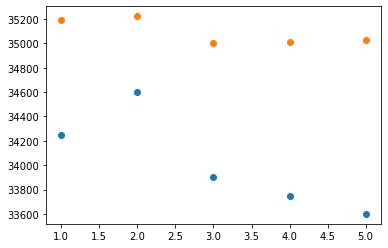

In [325]:
X=nilai_trainActual
Y=nilai_trainPred
C=[1,2,3,4,5]
plt.scatter(C,X[5])
plt.scatter(C,Y[5])
# plt.plot(Y[2])
plt.show()

# Predicting the next 5 day

In [316]:
data1=data_scale.shape[0]
data2=data1-timestep
data_7hariterakhir = data_scale[data2:]
print(data_7hariterakhir.shape)
data_7hariterakhir

(7, 1)


array([[0.35636364],
       [0.36727273],
       [0.36      ],
       [0.30545455],
       [0.28727273],
       [0.28363636],
       [0.30181818]])

In [317]:
samples=1
timest=data_7hariterakhir.shape[0]
features=data_7hariterakhir.shape[1]

In [318]:
timest

7

In [319]:
features

1

In [320]:
data_direshape= data_7hariterakhir.reshape(samples, timest, features)
data_direshape.shape

(1, 7, 1)

In [321]:
next5days=model.predict(data_direshape)
next5days

array([[0.33660096, 0.3401706 , 0.35140187, 0.35100216, 0.35743237]],
      dtype=float32)

In [322]:
next5days=data_fit.inverse_transform(next5days)
next5days

array([[32178.264, 32227.346, 32381.775, 32376.281, 32464.695]],
      dtype=float32)